<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [113]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [114]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url='http://yustiks.ru/dataset/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(url,  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [124]:
data.sample(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
29,1.00245,0.0,8.14,0,0.538,6.674,87.3,4.2390,4,307.0,21.0,380.23,11.98,21.0
346,0.06162,0.0,4.39,0,0.442,5.898,52.3,8.0136,3,352.0,18.8,364.61,12.67,17.2
350,0.06211,40.0,1.25,0,0.429,6.490,44.4,8.7921,1,335.0,19.7,396.90,5.98,22.9
252,0.08221,22.0,5.86,0,0.431,6.957,6.8,8.9067,7,330.0,19.1,386.09,3.53,29.6
146,2.15505,0.0,19.58,0,0.871,5.628,100.0,1.5166,5,403.0,14.7,169.27,16.65,15.6
286,0.01965,80.0,1.76,0,0.385,6.230,31.5,9.0892,1,241.0,18.2,341.60,12.93,20.1
454,9.51363,0.0,18.10,0,0.713,6.728,94.1,2.4961,24,666.0,20.2,6.68,18.71,14.9
340,0.06151,0.0,5.19,0,0.515,5.968,58.5,4.8122,5,224.0,20.2,396.90,9.29,18.7
384,20.08490,0.0,18.10,0,0.700,4.368,91.2,1.4395,24,666.0,20.2,285.83,30.63,8.8
334,0.03738,0.0,5.19,0,0.515,6.310,38.5,6.4584,5,224.0,20.2,389.40,6.75,20.7


In [115]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [116]:
data.shape

(506, 14)

Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



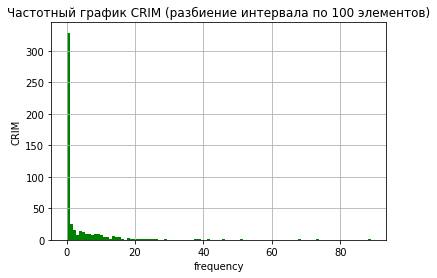

Распределение скорей всего экспоненциональное, отличается от искомых распределений. Но возможно и 6. логнормальное. Трудно их отличить в нуле. Логнормальное растёт с нуля, потом падает, а экспоненциальное сразу стартует с опредлённого значения и убывает. 6. Логнормальное


In [121]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
# CRIM: это уровень преступности на душу населения по городам
n, bins, patches = plt.hist(data['CRIM'], 100, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('CRIM')
plt.title('Частотный график CRIM (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()
print('Распределение скорей всего экспоненциональное, отличается от искомых распределений. Но возможно и 6. логнормальное. Трудно их отличить в нуле. Логнормальное растёт с нуля, потом падает, а экспоненциальное сразу стартует с опредлённого значения и убывает. 6. Логнормальное')

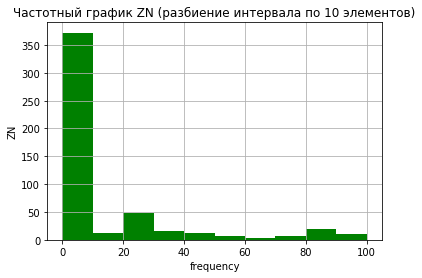

Распределение имеет два колокола справа. Тоже не совпадает ни с каким из заданных.


In [31]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
# ZN: это доля жилой земли, зонированной для участков площадью более 25 000 кв.фут.
n, bins, patches = plt.hist(data['ZN'], 10, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('ZN')
plt.title('Частотный график ZN (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()
print('Распределение имеет два колокола справа. Тоже не совпадает ни с каким из заданных.')

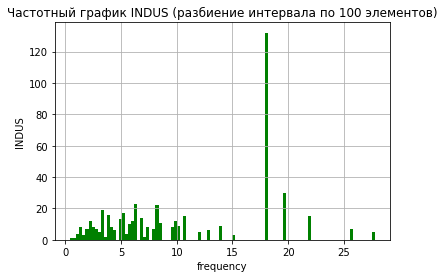

Распределение, возможно состоит из двух областей. Нормальное и геометрическое.
Но оно не может быть геометрическим, поскольку  оно не дискретное.
Видимо по данному признаку существует разновидности городских агломераций.
И в каждой из городских агломераций свой закон не-розничного бизнеса.
Вариант 6. Логнормальное распределение, если не учитывать разновидности агломераций


In [136]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
#INDUS: это доля акров не-розничного бизнеса на город.
n, bins, patches = plt.hist(data['INDUS'], 100, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('INDUS')
plt.title('Частотный график INDUS (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()
print('Распределение, возможно состоит из двух областей. Нормальное и геометрическое.')
print('Но оно не может быть геометрическим, поскольку  оно не дискретное.')
print('Видимо по данному признаку существует разновидности городских агломераций.')
print('И в каждой из городских агломераций свой закон не-розничного бизнеса.')
print('Вариант 6. Логнормальное распределение, если не учитывать разновидности агломераций')

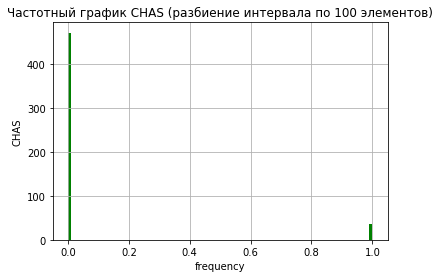

Вариант 4. Бернулли распределение.


In [32]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
# CHAS: это фиктивная переменная Charles River
# (она равна 1, Если тракт ограничивает реку; 0 в противном случае)
n, bins, patches = plt.hist(data['CHAS'], 100, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('CHAS')
plt.title('Частотный график CHAS (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()
print('Вариант 4. Бернулли распределение.')

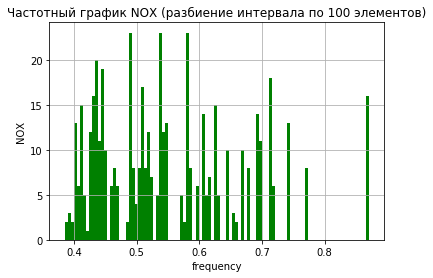

Не очевидно.


In [36]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
# NOX: это концентрация оксидов азота (частей на 10 миллионов)
n, bins, patches = plt.hist(data['NOX'], 100, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('NOX')
plt.title('Частотный график NOX (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()
print('Не очевидно.')

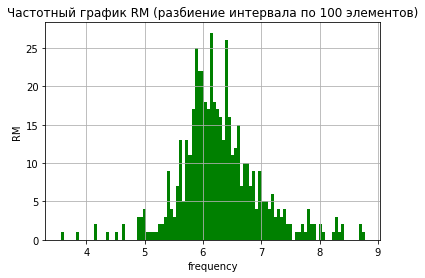

Вариант 1. Нормальное распределение.


In [40]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
# RМ: это среднее количество комнат на одно жилище.
n, bins, patches = plt.hist(data['RM'], 100, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('RM')
plt.title('Частотный график RM (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()
print('Вариант 1. Нормальное распределение.')

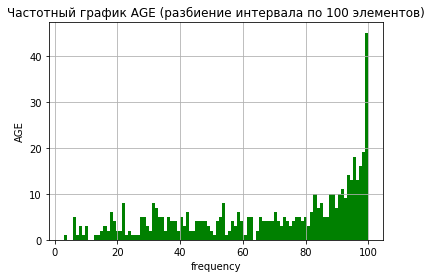

Не очевидно.


In [125]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
# AGE: это доля единиц(домов), занятых владельцами, построенных до 1940 года.
n, bins, patches = plt.hist(data['AGE'], 100, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('AGE')
plt.title('Частотный график AGE (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()
print('Не очевидно.')

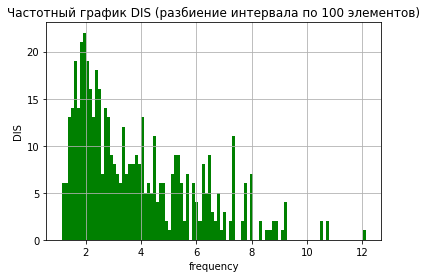

Вариант 6. Логнормальное распределение. Должны ведь быть дома и рядом с центрами занятости.
Отсюда и нулевые значения. Есть пик. А потом и экспоциональный спад от расстояния.


In [137]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
# DIS: это взвешенные расстояния до пяти бостонских центров занятости.
n, bins, patches = plt.hist(data['DIS'], 100, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('DIS')
plt.title('Частотный график DIS (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()
print('Вариант 6. Логнормальное распределение. Должны ведь быть дома и рядом с центрами занятости.')
print('Отсюда и нулевые значения. Есть пик. А потом и экспоциональный спад от расстояния.')

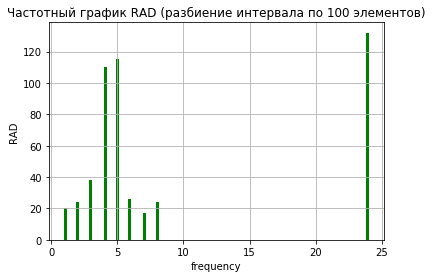

Вариант 3. Биноминальное распределение.
Без учёта уникального места, где радиальные магистрали близко-близко.


In [139]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
# RAD: это показатель доступности радиальных магистралей.
n, bins, patches = plt.hist(data['RAD'], 100, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('RAD')
plt.title('Частотный график RAD (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()
print('Вариант 3. Биноминальное распределение.')
print('Без учёта уникального места, где радиальные магистрали близко-близко.')

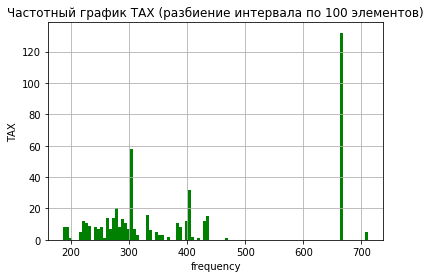

Не очевидно.


In [141]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
# TAX: это ставка налога на недвижимость с полной стоимостью в расчете на 10 000 долларов.
n, bins, patches = plt.hist(data['TAX'], 100, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('TAX')
plt.title('Частотный график TAX (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()
print('Не очевидно.')

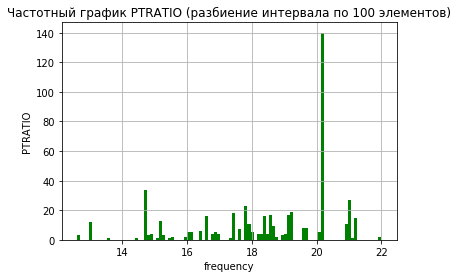

Не очевидно.


In [144]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
# PTRATIO: это соотношение учеников и учителей по городу
n, bins, patches = plt.hist(data['PTRATIO'], 100, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('PTRATIO')
plt.title('Частотный график PTRATIO (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()
print('Не очевидно.')

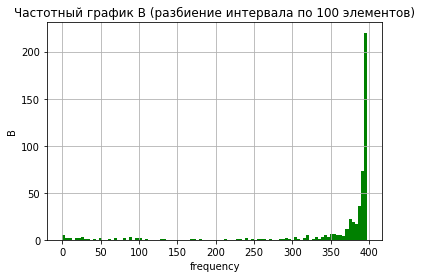

Тоже неочевидная категория. Можно только сделать вывод,
что существуют области в городе, где доля афроамериканцев больше.


In [148]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
# B: Это рассчитывается как 1000(Bk — 0.63)², где Bk -
# доля лиц афроамериканского происхождения по городу
n, bins, patches = plt.hist(data['B'], 100, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('B')
plt.title('Частотный график B (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()
print('Тоже неочевидная категория. Можно только сделать вывод,')
print('что существуют области в городе, где доля афроамериканцев больше.')

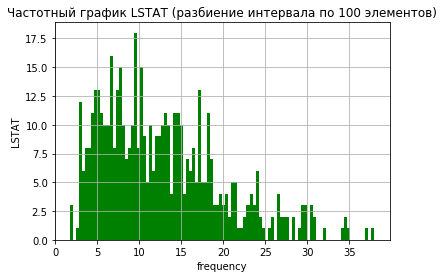

Вариант 6. Логнормальное распределение.


In [149]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
# LSTAT: это процент более низкого статуса населения
n, bins, patches = plt.hist(data['LSTAT'], 100, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('LSTAT')
plt.title('Частотный график LSTAT (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()
print('Вариант 6. Логнормальное распределение.')

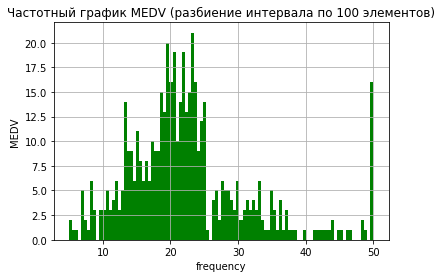

Вариант 1. Нормальное распределение.


In [150]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
# MEDV: это среднее значение занимаемых владельцами домов в 1000 долларов
n, bins, patches = plt.hist(data['MEDV'], 100, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('MEDV')
plt.title('Частотный график MEDV (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()
print('Вариант 1. Нормальное распределение.')

Построить матрицу корреляций для данной таблицы и выбрать максимально коррелирующий атрибут (несколько атрибутов) с ценой на дома (MEDV атрибут).

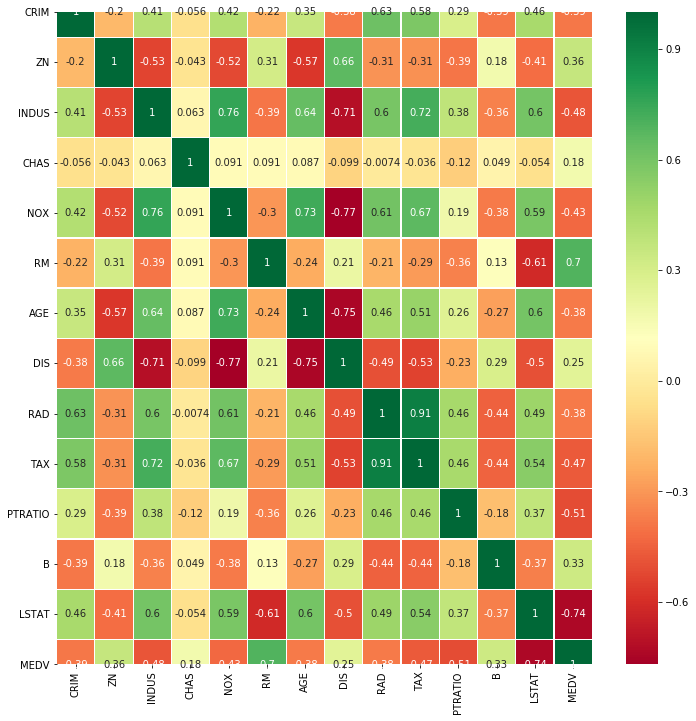

In [17]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

Я выбираю RM: Это среднее количество комнат на одно жилище.

Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 

 LSTAT Это процент более низкого статуса населения

ДУМКИ: Цель написать линейную регрессию, используя два атрибута. Глобально: предсказывать одну переменную по другой. Локально: взять два атрибута и описать их поведение.
ВОЗМОЖНЫЙ ХОД СОБЫТИЙ: линейную регрессию пишем на атрибуты, которые 'допустим' имеют линейную зависимость. Поэтому пишем всё для MEDV и LSTAT. А потом 'допустим' ещё для чего-нибудь.
ПРЕДПОСЫЛКИ ВЫБОРА ЭТИХ КАТЕГОРИЙ: так было задумано на лекции и почему бы населению с более низким статусом ни покупать бы дома?
Как говорится, чем меньше низкий статус населения, тем выше статус населения и тем выше цена на дом.
И по модулю не плох выбор, 0.74. Прям единичка. Ещё хороши пары-антипары. Это DIS (INDIS|NOX|AGE) ... AGE|NOX ... LSTAT|MEDV. Все они прям весьма-весьма.
Отрицание отрицания и вот тебе смена знака и новые перспективы.
~DIS (INDIS|NOX|AGE) ... ~AGE|NOX ... ~LSTAT|MEDV

MEDV vs LSTAT

1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии

Построим модель для двух переменных MEDV и LSTAT.
Библиотека sklearn в python - мощное средство для анализа данных.
Позволяет строить различные модели.
Для sklearn сделаем reshape(-1,1) и преобразуем Series данные в numpy array.

In [28]:
medv = data['MEDV']
lstat = data['LSTAT']
medv = np.array(medv).reshape(-1,1)
lstat = np.array(lstat).reshape(-1,1)


Линейная регрессия строится на том основании, что две переменные имеют линейную зависимость.

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

**Задача:** научиться предсказывать зависимость допустим **цены дома (MEDV)** в Бостоне по  **проценту более низкого статуса населения (LSTAT)** с помощью линейной регрессии!

Разделим данные на 80% тренировочных и на 20% тестовых

In [30]:
from sklearn.model_selection import train_test_split

# x = MEDV,
# y = LSTAT
X_train, X_test, y_train, y_test = train_test_split(
    medv,
    lstat,
    test_size = 0.2
)

Обучим модель с помощью fit() метода

In [31]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Посмотрим предсказания модели на тестируемых данных

In [32]:
predicted_y = model.predict(X_test)

Посчитаем ошибку модели

In [33]:
model.score(X_test, y_test)

0.47412754068361745

model.score - подсчет среднеквадратичной ошибки

47% точности на тестовых данных

Построим график линейной регресии

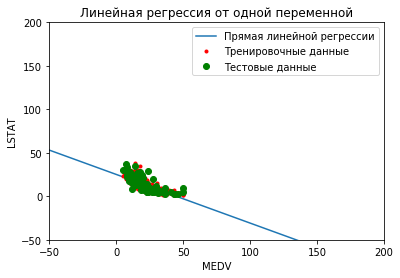

In [34]:
plt.xlabel('MEDV')
plt.ylabel('LSTAT')
plt.title('Линейная регрессия от одной переменной')
# Построим прямую для регрессии
# Создадим 100 точек для предсказаний
x = np.linspace(-50, 200, 100)
# Посчитаем предсказанные значения
# y = kx + b
# k = model.coef_
# b = model.intercept_
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.xlim(-50,200)
plt.ylim(-50,200)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

AGE vs NOX

Второй пример линейной регрессии, полученной графически:

AGE:  доля занятых владельцами домов, построенных до 1940 года

NOX: концентрация оксидов азота (долей на 10 миллионов) 

**Jointplot**: AGE и NOX. Можно также заметить, что между ними корреляция нелинейна.

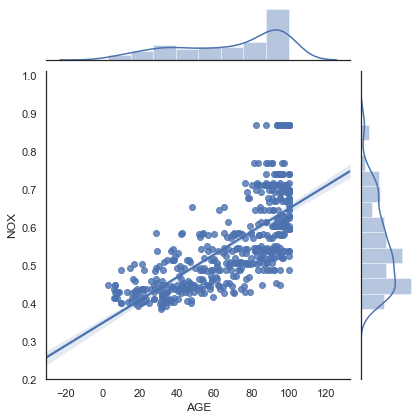

In [35]:
age = data['AGE']
nox = data['NOX']
sns.set(style="white", color_codes=True)
g = sns.jointplot(x=age, y=nox, data=data, kind='reg')
plt.show()

Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [152]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [153]:
data.shape

(156, 11)

Приведём примеры матриц ковариаций, посчитанных попарно:

In [157]:
data[['Freedom', 'Ladder']].cov()

,Freedom,Ladder
Freedom,2015.000000,1108.090909
Ladder,1108.090909,2041.000000


In [156]:
data[['Social support', 'Healthy life\nexpectancy']].cov()

,Social support,Healthy life\nexpectancy
Social support,2015.0000,1471.9191
Healthy life\nexpectancy,1471.9191,1887.5000


In [165]:
data[['Country (region)', 'Log of GDP\nper capita']].cov()
# В колонке 'Country (region)' строковые (не числовые) значения,
# В результате:

,Log of GDP\nper capita
Log of GDP\nper capita,1938.0


А вот и сама матрица ковариаций:

In [168]:
print(data.cov())

                               Ladder  SD of Ladder  Positive affect  \
Ladder                    2041.000000   1100.838710       995.928571   
SD of Ladder              1100.838710   2041.000000       173.694805   
Positive affect            995.928571    173.694805      2015.000000   
Negative affect           1061.207792   1259.805195       785.240260   
Social support            1657.428571   1219.519481       778.331169   
Freedom                   1108.090909    512.363636      1373.766234   
Corruption                 370.874150    506.897959       405.292517   
Generosity                1008.948052    797.779221       715.077922   
Log of GDP\nper capita    1615.000000   1254.526490       586.120000   
Healthy life\nexpectancy  1613.369128   1208.026846       647.908897   

                          Negative affect  Social support      Freedom  \
Ladder                        1061.207792     1657.428571  1108.090909   
SD of Ladder                  1259.805195     1219.519481  

Сколько в данной таблице (data) отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop).


In [53]:
data.isnull().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

In [54]:
type(data.isnull().sum())

pandas.core.series.Series

In [61]:
dis = data.isnull().sum().sum()

In [62]:
dis

23

Всего  в таблице 23 отсутствующих значения.

Сколько стран в выборке? Написать ответ. 

In [64]:
data.iloc[:, [0]]

,Country (region)
0,Finland
1,Denmark
2,Norway
3,Iceland
4,Netherlands
...,...
151,Rwanda
152,Tanzania
153,Afghanistan
154,Central African Republic


In [65]:
data.columns

Index(['Country (region)', 'Ladder', 'SD of Ladder', 'Positive affect',
       'Negative affect', 'Social support', 'Freedom', 'Corruption',
       'Generosity', 'Log of GDP\nper capita', 'Healthy life\nexpectancy'],
      dtype='object')

In [66]:
bingo=data.columns[0]

In [67]:
print(bingo)

Country (region)


In [59]:
avottak=data.iloc[:, [0]]

In [68]:
len(avottak[bingo].unique())

156

Ответ: Отсутствующих значений по категории 'counrty' нет, drop по country не нужен. Всего уникальных стран в выборке 156.

Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

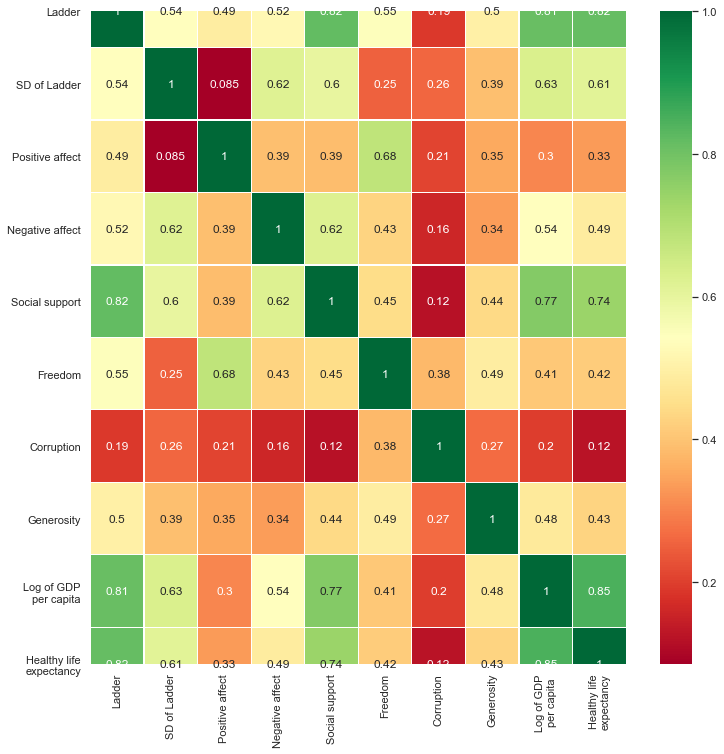

In [72]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

По всей таблице матрицы коррелляций вывод:
таблица явно учебная, присутствуют и отрицательные категории 
и положительные категории (с позиции социума).

В матрице коррелляций нет отрицательных коэффициентов,
название 'Happiness report' - 100 % попадание.

ВЫВОДЫ:
1. Чем  выше валовой внутренний продукт на душу населения, тем здоровей население.
2. Даже коррупция в этой подборке влияет на здоровье в лучшую сторону.
3. Чем больше свобода, тем больше коррупция. Это самый большой коэффициент.


# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

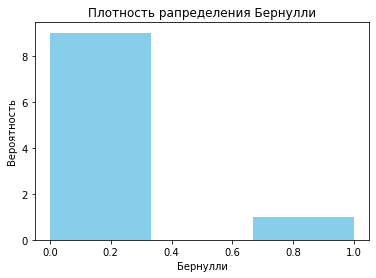

Плотность вероятности, при одном броске, одного значения это 1/6.


In [169]:
# import seaborn
import seaborn as sns
data_bern = stats.bernoulli.rvs(size=10,p=1/6)
ax= sns.distplot(data_bern,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Бернулли', ylabel='Вероятность')
plt.title('Плотность рапределения Бернулли')
plt.show()
print('Плотность вероятности, при одном броске, одного значения это 1/6.')

[Кубик бросают 10 раз](http://www.cyberforum.ru/statistics/thread265901.html)

In [170]:
data_binom = stats.binom.rvs(n=10,p=1/6,size=10000)

[Text(0, 0.5, 'Частота (плотность)'),
 Text(0.5, 0, 'Биноминальное распределение')]

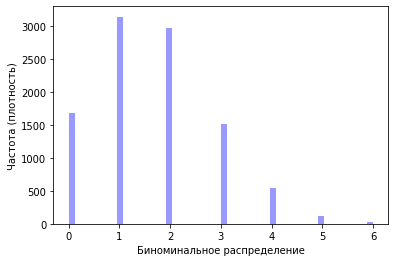

In [171]:
ax = sns.distplot(data_binom,
                  kde=False,
                  color='blue')
ax.set(xlabel='Биноминальное распределение', ylabel='Частота (плотность)')

Cмоделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

Моделируем 100 подбрасываний.

In [99]:
data_binom = stats.binom.rvs(n=100,p=1/6,size=10000)

[Text(0, 0.5, 'Частота (плотность)'),
 Text(0.5, 0, 'Биноминальное распределение')]

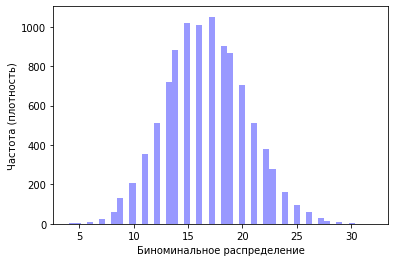

In [100]:
ax = sns.distplot(data_binom,
                  kde=False,
                  color='blue')
ax.set(xlabel='Биноминальное распределение', ylabel='Частота (плотность)')

Моделируем сумму 100 подбрасываний 1000 раз.

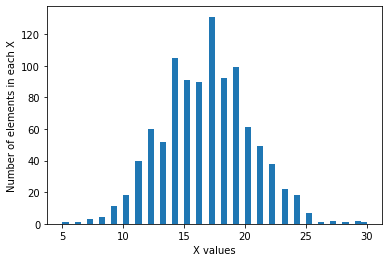

In [104]:
number_of_sums = 1000
X1 = np.zeros([number_of_sums])
for i in range(number_of_sums):
    # суммируем все элементы равномерных выборок
    X1[i] = np.sum(data_binom[i])#/number_of_times
plt.hist(X1, 50)
plt.xlabel('X values')
plt.ylabel('Number of elements in each X')
plt.show()

Моделируем сумму 100 подбрасываний 10000 раз.

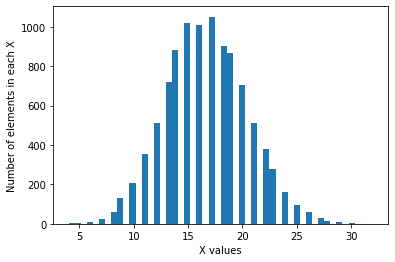

In [105]:
number_of_sums = 10000
X1 = np.zeros([number_of_sums])
for i in range(number_of_sums):
    # суммируем все элементы равномерных выборок
    X1[i] = np.sum(data_binom[i])#/number_of_randoms
plt.hist(X1, 50)
plt.xlabel('X values')
plt.ylabel('Number of elements in each X')
plt.show()

Меняем условия, меняется график. События случайные, не зависимые и их много, можем
применить Центральную Предельную Теорему.